In [9]:
import os
import katdal
import katpoint
%pylab inline
import scape
import string
import time
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.WARNING)

Populating the interactive namespace from numpy and matplotlib


In [10]:
name = '1657625710' #'1607433065'  # e.g 1583650035
file_=str('http://archive-gw-1.kat.ac.za:7480/'+name+'/'+name+'_sdp_l0.full.rdb')
rdb = katdal.open(file_)
#print(rdb)

In [7]:
def data_cal(file, nd_models, pol):
    ants = [file.ants[i].name for i in range(63)]
    #ants = ['m049', 'm050','m058']
    ants.remove('m060')
    angle_sep = {}
    temp = {}
    for ant in range(62):
        if ants[ant] == 'm050':
            data = scape.DataSet(file, baseline="%s" % (ants[ant]), nd_models='katconfig/user/noise-diode-models/mkat/nd_model_m050')
        elif ants[ant] == 'm058':
            data = scape.DataSet(file, baseline="%s" % (ants[ant]), nd_models='katconfig/user/noise-diode-models/mkat/nd_model_m058')
        else:
            data = scape.DataSet(file, baseline="%s" %(ants[ant]), nd_models=nd_models)
        
        data = data.convert_power_to_temperature()
        data = data.select(flagkeep='~nd_on') #removing the noise diode
        data = data.select(labelkeep='scan')  #keeps the scan and remove anything at the end
    
        angle_sep[ants[ant]] = np.sqrt(np.sum((np.degrees(data.scans[0].target_coords))**2,axis=0))
        temp[ants[ant]] = data.scans[0].pol(2*pol.upper()).mean(axis=1) 
        
        
    return angle_sep, temp, data, ants

In [10]:
nd_model ='katconfig/user/noise-diode-models/mkat'
angle, temp, data, ants = data_cal(rdb, nd_model, 'h')

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_

In [14]:
data = scape.DataSet(rdb, baseline="%s" % 'm050', nd_models='katconfig/user/noise-diode-models/mkat/nd_model_m050')

In [16]:
data.scans[0].target_coords

array([[-8.99051235e-01, -9.34281034e-01, -1.01376150e+00,
        -1.06036704e+00, -1.08632455e+00, -1.10401309e+00,
        -1.11456055e+00, -1.11844595e+00, -1.11613931e+00,
        -1.10812266e+00, -1.09484996e+00, -1.07674906e+00,
        -1.05423001e+00, -1.02767644e+00, -9.97448134e-01,
        -9.63877938e-01, -9.27288680e-01, -8.87939331e-01,
        -8.46072226e-01, -8.01974520e-01, -7.55864166e-01,
        -7.07939116e-01, -6.58349838e-01, -6.07338211e-01,
        -5.55029219e-01, -5.01558180e-01, -4.47105597e-01,
        -3.91783159e-01, -3.35675395e-01, -2.78982245e-01,
        -2.21807770e-01, -1.64184329e-01, -1.06269642e-01,
        -4.82126921e-02,  9.97382212e-03,  6.81425192e-02,
         1.26182708e-01,  1.69157601e-01,  1.76488643e-01,
         1.76900511e-01,  1.76878762e-01,  1.76881909e-01,
         1.76885790e-01,  1.76887850e-01,  1.76894944e-01,
         1.76897036e-01,  1.76902515e-01,  1.76907793e-01,
         1.76911935e-01,  1.76915087e-01,  1.76921335e-0

In [6]:
import pandas as pd

df = pd.DataFrame.from_dict(angle)
df1 = pd.DataFrame.from_dict(temp)

df.to_csv(r'Lband_angle.csv', index = False, header=True)
df1.to_csv(r'Lband_temp.csv', index = False, header=True)

ValueError: DataFrame constructor not properly called!

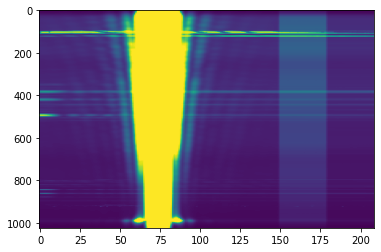

In [63]:
plt.imshow(data.scans[1].data[:,:,0].T, aspect='auto')

In [8]:
ants = [rdb.ants[i].name for i in range(63)]
ants.remove('m060')
ants.remove('m008')
ants.remove('m021')
ants.remove('m024')


In [4]:
from operator import itemgetter



def ant_stats(ants, angle, temp):

    ant_temp = []
    ant_angle = []
    ant_std = {}
    ant_mean = {}
    for ant in ants:
        ant_std[ant] = std(temp[ant]) #calculate the std on temp data for each antenna
        ant_mean[ant] = mean(temp[ant]) #calculate the mean on temp data for each antenna
        #append temp and angular seperation for each antenna
        ant_temp.append(temp[ant])  
        ant_angle.append(angle[ant])
    
    
    bin_temp = []
    bin_angle = []
    for i in range(178):
        #extracting each element at the same position for all ants
        bin_temp.append(list(map(itemgetter(i), ant_temp)))
        bin_angle.append(list(map(itemgetter(i), ant_angle)))

    mean_temp = []
    std_temp = []
    mean_angle = []
    for ind in range(178):
        #calculate mean and std for each bin created on temp data
        m_t = mean(bin_temp[ind])
        s_t = std(bin_temp[ind])
        m_a = mean(bin_angle[ind])
        
        mean_temp.append(m_t)
        std_temp.append(s_t)
        mean_angle.append(m_a)
        
    mean_temp = array(mean_temp)
    std_temp = array(std_temp)
    mean_angle = array(mean_angle)
        
    return mean_temp, std_temp, mean_angle


In [5]:
nbins     = 20
ants = [rdb.ants[i].name for i in range(63)]
ants.remove('m060')

#creating list of zeros using bin as size[x-values, y-values, standard deviation values]
xv       = zeros(nbins)
yv       = zeros(nbins)
sv       = zeros(nbins)

#calculating stats
mean_temp, std_temp, mean_angle = ant_stats(ants, angle, temp)

#creating values representing the x-axis 
bins     = linspace(min(mean_angle),max(mean_angle), nbins)
#print(bins)

#returning the indexes of all the values according to the binning
angle_ind  = digitize(mean_angle, bins) -1
#print(angle_ind)

NameError: name 'temp' is not defined

In [6]:
#extracting all the values for each bin
dat = []
for k in range(nbins):
    xv[k] = mean(mean_angle[angle_ind==k])
    yv[k] = mean(mean_temp[angle_ind==k])
    sv[k] = std(mean_temp[angle_ind==k])

    dat.append([xv[k], yv[k], sv[k]])
dat = array(dat)

NameError: name 'mean_angle' is not defined

In [15]:
print(xv)
print(yv)
print(sv)

[ 0.27198059  0.81595307  1.35991187  1.90385656  2.44777719  2.99167565
  3.4995374   4.01129032  4.55506366  5.09878377  5.64246105  6.18606921
  6.72961312  7.27308299  7.81647411  8.35978492  8.90300141  9.44609543
 10.1702308  10.22806189]
[186.48471069 186.34757996 168.62631226 130.04666138  65.29440308
  39.49577713  29.65750122  26.27674484  22.61419487  21.50542641
  21.0106945   20.70385361  20.6713028   20.2701149   19.7554512
  20.00954437  20.78290367  21.07128906  18.68807411  18.13210678]
[ 0.11268177  0.39796847  8.86527634 23.21289825 10.30293274  5.86757421
  0.99104577  1.20895731  0.63783222  0.32050952  0.27465534  0.16265257
  0.27369499  0.28082788  0.25442711  0.69774318  1.41544342  1.9192394
  1.29590356  0.        ]


Q1 quantile :  19.451680660247803
Q2 quantile :  21.317035675048828
Q3 quantile :  37.17317581176758


TypeError: 'function' object is not subscriptable

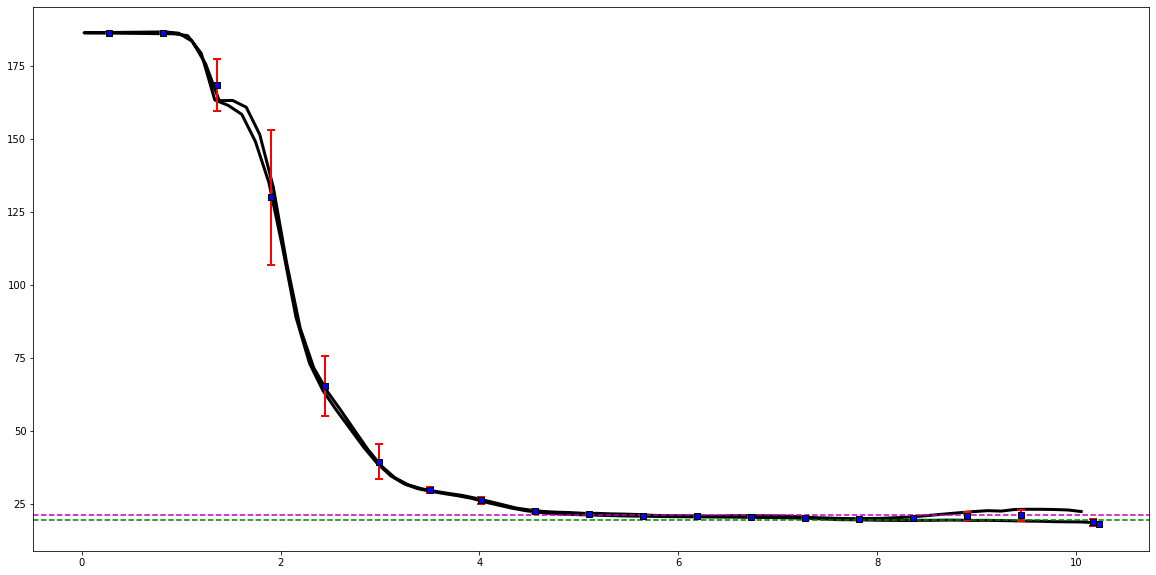

In [32]:

ants = [rdb.ants[i].name for i in range(63)]
ants.remove('m060')

q1 = np.quantile(mean_temp, .25)
print("Q1 quantile : ", q1) 
q2 = np.quantile(mean_temp, .50)
print("Q2 quantile : ", q2 ) 
q3 = np.quantile(mean_temp, .75)
print("Q3 quantile : ", q3)

figure(figsize=(20, 10))
subplots_adjust(hspace=0.5)

median_ = median(mean_temp)
#print("The mean is : ", mean(mean_temp))
pol = 'h'

plot(mean_angle, mean_temp, "-k", label='average', linewidth=3)
errorbar(xv, yv, sv, fmt='ks',lw=2,capsize=4, capthick=2, zorder=3, mfc='b', mec='black',ecolor='r')
axhline(y = q1, color='g', linestyle='--', label="Q1")
axhline(y = q2, color='m', linestyle='--', label="Median")
#axhline(y = q3, color='y', linestyle='--', label="Q3")
for index, ant in enumerate(ants):
    plot(angle[ant], temp[ant], "*c", alpha=0.05)
    text(8, 45, 'Q1 = 19.45 K', fontsize = 15, color = 'g')
    text(8, 43, 'Median = 21.32 K', fontsize = 15, color = 'm')
    #text(8, 41, 'Q3 = 37.17 K', fontsize = 15, color = 'y')
#     fill_between(mean_angle, mean_temp-std_temp, mean_temp+std_temp,
#                  facecolor="orange", # The fill color
#                  color='blue',       # The outline color
#                  alpha=0.2)
    ylim(None, 50)
    xlim(None, 10)
    xlabel('Seperation[degrees]', fontsize=20)
    ylabel('Temperature[K]', fontsize=20)
    title('System temperature of MeerKAT in proximity to the Sun', fontsize=30)
    legend(loc='center left', bbox_to_anchor=(1, 0.5))
grid()
show()

In [16]:
angle_sep = np.sqrt(np.sum((np.degrees(dataset.scans[0].target_coords))**2,axis=0))
temp = data_c.scans[0].pol("VV").mean(axis=1)

In [12]:
scape.plot_waterfall?

([<matplotlib.image.AxesImage at 0x7fac3c141be0>],
 [Text(208.03943836688995, 0.02, '0')])

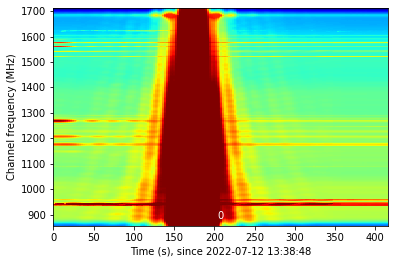

In [30]:
scape.plot_spectrogram(data)

(<AxesSubplot:xlabel='Frequency (MHz)', ylabel='Temperature (dB K)'>,
 [6.2630997, 26.133957])

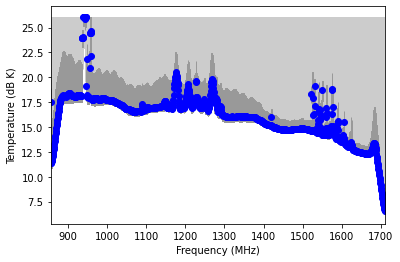

In [31]:
scape.plot_spectrum(data)

DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f77884c8f28>
DEBUG: Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f77884c8f28> on colorbar
DEBUG: Setting pcolormesh


Text(0, 0.5, 'Time (dumps)')

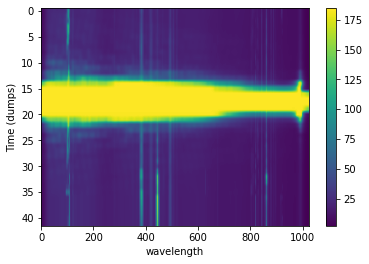

In [18]:
imshow(data_c.scans[0].pol("HH"), aspect='auto')
colorbar()
xlabel("wavelength")
ylabel("Time (dumps)")

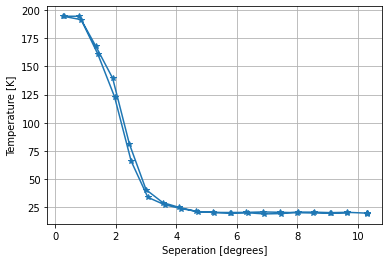

In [20]:
plot(angle_sep, temp, "-*")
xlabel('Seperation [degrees]')
ylabel('Temperature [K]')
grid()